In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/modern_feminism_sentiment/data/processed/feminism_sentiment_results.csv')


In [ ]:
df.head()
df.columns


Index(['date', 'username', 'retweets', 'likes', 'tweet_text', 'hashtags',
       'clean_text', 'neg', 'neu', 'pos', 'compound', 'sentiment'],
      dtype='object')

In [ ]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])


In [ ]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.to_period("M")


In [ ]:
yearly_sentiment = pd.crosstab(df["year"], df["sentiment"])
yearly_sentiment


sentiment,Negative,Neutral,Positive
year,,,
2018,33172,27380,49766
2019,36698,28452,57976
2020,978,869,2026


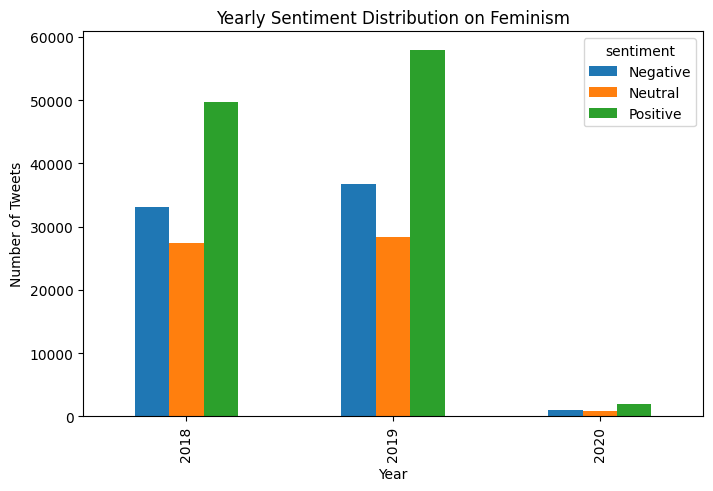

In [ ]:
yearly_sentiment.plot(
    kind="bar",
    figsize=(8,5),
    title="Yearly Sentiment Distribution on Feminism"
)
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.show()


In [ ]:
monthly_trend = (
    df.groupby("month")["compound"]
    .mean()
    .reset_index()
)

monthly_trend["month"] = monthly_trend["month"].astype(str)
monthly_trend.head()


,month,compound
0,2018-04,0.098606
1,2018-05,0.083109
2,2018-06,0.089896
3,2018-07,0.098908
4,2018-08,0.084786


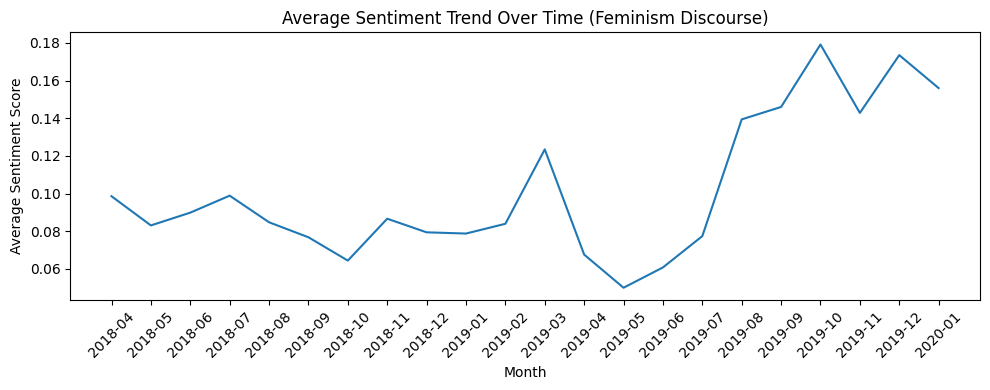

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(monthly_trend["month"], monthly_trend["compound"])
plt.xticks(rotation=45)
plt.title("Average Sentiment Trend Over Time (Feminism Discourse)")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.tight_layout()
plt.show()


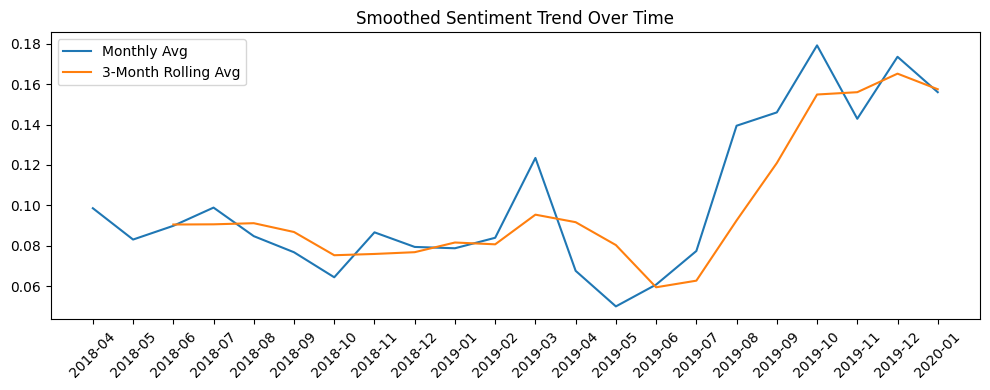

In [ ]:
monthly_trend["rolling_avg"] = monthly_trend["compound"].rolling(window=3).mean()

plt.figure(figsize=(10,4))
plt.plot(monthly_trend["month"], monthly_trend["compound"], label="Monthly Avg")
plt.plot(monthly_trend["month"], monthly_trend["rolling_avg"], label="3-Month Rolling Avg")
plt.legend()
plt.xticks(rotation=45)
plt.title("Smoothed Sentiment Trend Over Time")
plt.tight_layout()
plt.show()


In [ ]:
monthly_trend.to_csv("feminism_sentiment_trend.csv", index=False)
print("✅ feminism_sentiment_trend.csv saved")


✅ feminism_sentiment_trend.csv saved


In [15]:
ls


drive/  feminism_sentiment_trend.csv  sample_data/
